In [ ]:
#Setting include to FALSE on this chunk so that it doesn't appear in the output
# Load necessary libraries
options(repos = c(CRAN = "https://cloud.r-project.org"))
if (!require("tidyverse")) install.packages("tidyverse", dependencies = TRUE)
if (!require("cowplot")) install.packages("cowplot", dependencies = TRUE)
if (!require("plotly")) install.packages("plotly", dependencies = TRUE)
if (!require("ggcorrplot")) install.packages("ggcorrplot", dependencies = TRUE)
if (!require("pastecs")) install.packages("pastecs", dependencies = TRUE)
if (!require("PerformanceAnalytics")) install.packages("PerformanceAnalytics", dependencies = TRUE)
if (!require("patchwork")) install.packages("patchwork", dependencies = TRUE)
if (!require("Hmisc")) install.packages("Hmisc", dependencies = TRUE)
if (!require("corrplot")) install.packages("corrplot", dependencies = TRUE)

library(tidyverse) # Tools for wrangling data
library(cowplot) # For organising plots into a grid
library(patchwork) # For matrix layout
library(plotly) # For Animating plots
library(ggcorrplot) # For Correlation Heatmaps 
library(corrplot) # For correlation matrices
library(PerformanceAnalytics)# For standardised skewness and kurtosis
library(Hmisc) # For generating correlation


#We are using a file created from the SPSS file survey.sav  taken from SPSS Survival Manual 6th Edition Julie Pallant (http://spss.allenandunwin.com.s3-website-ap-southeast-2.amazonaws.com/data-files.html#.Wb0vvnWP-po). 
#This has been saved to a .dat format - more easily readable in R.

# Load dataset - format the location using file.path to ensure it will locate it correctly
mydata <- file.path("C:/Users/Matt/Desktop/VisualizingDataRModule/Week4")
datapath <- file.path(mydata,'survey.dat')

#Load it into the dataframe called survey (.dat file so use read.Table)
survey <- read.table(datapath)

#Setting the column names to be that used in the dataset but in lowercase to make life a bit easier
colnames(survey) <- tolower(colnames(survey))

In [13]:
# Summarise the data
summary(survey)

str(survey)

survey <- na.omit(survey)

       id            sex                 age          marital         
 Min.   :  1.0   Length:439         Min.   :18.00   Length:439        
 1st Qu.:131.5   Class :character   1st Qu.:26.00   Class :character  
 Median :280.0   Mode  :character   Median :36.00   Mode  :character  
 Mean   :276.4                      Mean   :37.44                     
 3rd Qu.:422.5                      3rd Qu.:47.00                     
 Max.   :702.0                      Max.   :82.00                     
                                                                      
    child               educ              source             smoke          
 Length:439         Length:439         Length:439         Length:439        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                               

'data.frame':	439 obs. of  134 variables:
 $ id        : int  415 9 425 307 440 484 341 300 61 24 ...
 $ sex       : chr  "FEMALES" "MALES" "FEMALES" "MALES" ...
 $ age       : int  24 39 48 41 23 31 30 23 18 23 ...
 $ marital   : chr  "MARRIED FIRST TIME" "LIVING WITH PARTNER" "MARRIED FIRST TIME" "REMARRIED" ...
 $ child     : chr  "YES" "YES" "YES" "YES" ...
 $ educ      : chr  "COMPLETED UNDERGRADUATE" "COMPLETED UNDERGRADUATE" "SOME SECONDARY" "SOME SECONDARY" ...
 $ source    : chr  "LIFE IN GENERAL" "WORK" "CHILDREN" "WORK" ...
 $ smoke     : chr  "NO" "YES" "NO" "NO" ...
 $ smokenum  : int  NA 2 NA 0 0 NA 0 100 40 0 ...
 $ op1       : int  3 2 3 3 3 2 3 4 3 1 ...
 $ op2       : int  2 3 1 1 2 2 5 1 4 3 ...
 $ op3       : int  3 4 3 5 3 2 1 3 2 1 ...
 $ op4       : int  2 3 3 3 2 2 4 1 4 4 ...
 $ op5       : int  4 5 3 5 1 3 1 4 2 1 ...
 $ op6       : int  2 4 4 1 3 4 4 2 4 5 ...
 $ mast1     : int  2 2 3 2 1 1 4 2 3 3 ...
 $ mast2     : int  4 4 3 4 4 3 2 4 2 1 ...
 $ mast3    

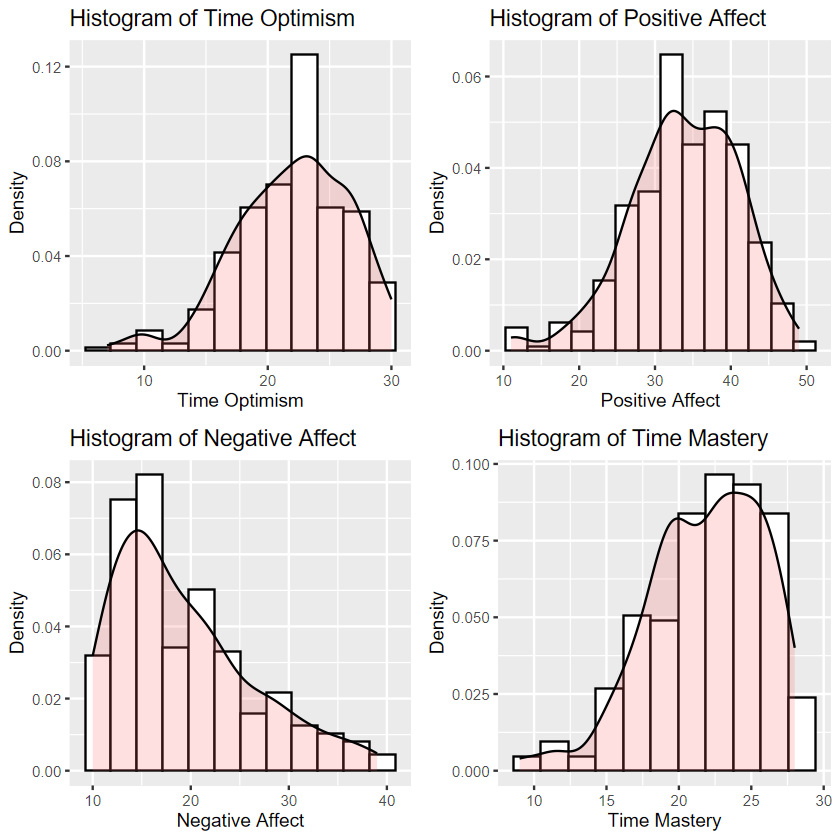

In [15]:
# Histogram with density plots for toptim tposaff tnegaff tmast
toptim_hist <- ggplot(survey, aes(x = toptim)) +
  geom_histogram(aes(y = after_stat(density)), bins = nclass.FD(survey$toptim), colour = "black", fill = "white") +
  geom_density(alpha = .2, fill = "#FF6666") +
  ggtitle("Histogram of Time Optimism") +
  xlab("Time Optimism") +
  ylab("Density")


tposaff_hist <- ggplot(survey, aes(x = tposaff)) +
  geom_histogram(aes(y = after_stat(density)), bins = nclass.FD(survey$tposaff), colour = "black", fill = "white") +
  geom_density(alpha = .2, fill = "#FF6666") +
  ggtitle("Histogram of Positive Affect") +
  xlab("Positive Affect") +
  ylab("Density")

tnegaff_hist <- ggplot(survey, aes(x = tnegaff)) +
  geom_histogram(aes(y = after_stat(density)), bins = nclass.FD(survey$tnegaff), colour = "black", fill = "white") +
  geom_density(alpha = .2, fill = "#FF6666") +
  ggtitle("Histogram of Negative Affect") +
  xlab("Negative Affect") +
  ylab("Density")


tmast_hist <- ggplot(survey, aes(x = tmast)) +
  geom_histogram(aes(y = after_stat(density)), bins = nclass.FD(survey$tmast), colour = "black", fill = "white") +
  geom_density(alpha = .2, fill = "#FF6666") +
  ggtitle("Histogram of Time Mastery") +
  xlab("Time Mastery") +
  ylab("Density")

# Cowplot to arrange the plots
histogram_grid <- plot_grid(toptim_hist, tposaff_hist, tnegaff_hist, tmast_hist, nrow = 2, ncol = 2)

histogram_grid

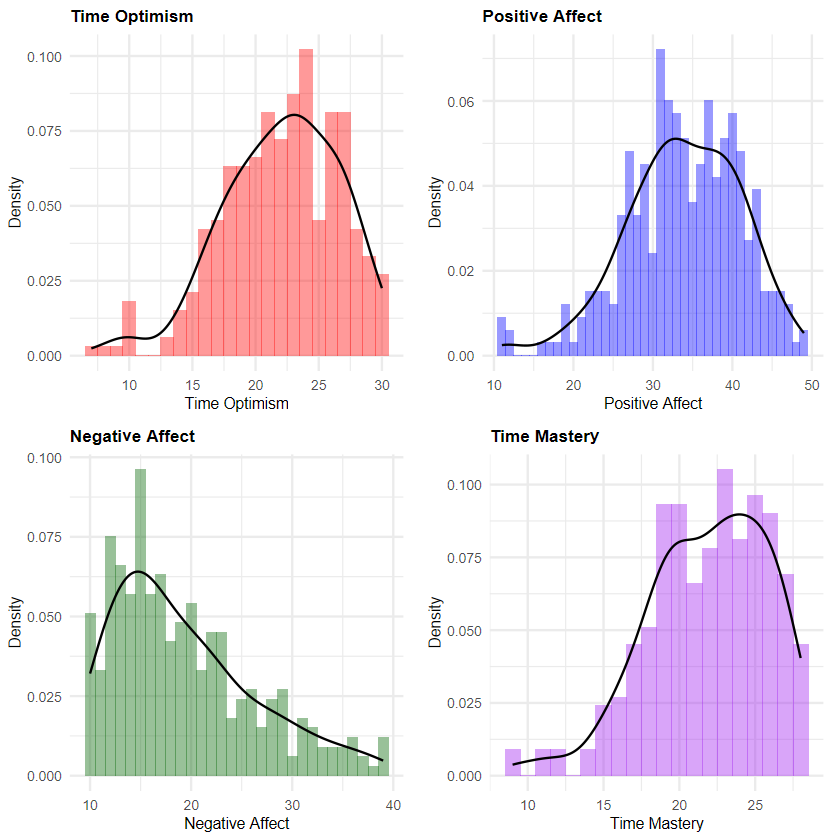

In [16]:
# Time Optimism Histogram
toptim_hist <- ggplot(survey, aes(x = toptim)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, alpha = 0.4, position = "identity", fill = "red") +
  geom_density(alpha = 0.7, adjust = 1.2) +
  labs(title = "Time Optimism", x = "Time Optimism", y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

# Positive Affect Histogram
tposaff_hist <- ggplot(survey, aes(x = tposaff)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, alpha = 0.4, position = "identity", fill = "blue") +
  geom_density(alpha = 0.7, adjust = 1.2) +
  labs(title = "Positive Affect", x = "Positive Affect", y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

# Negative Affect Histogram
tnegaff_hist <- ggplot(survey, aes(x = tnegaff)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, alpha = 0.4, position = "identity", fill = "darkgreen") +
  geom_density(alpha = 0.7, adjust = 1.2) +
  labs(title = "Negative Affect", x = "Negative Affect", y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

# Time Mastery Histogram
tmast_hist <- ggplot(survey, aes(x = tmast)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 1, alpha = 0.4, position = "identity", fill = "purple") +
  geom_density(alpha = 0.7, adjust = 1.2) +
  labs(title = "Time Mastery", x = "Time Mastery", y = "Density") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

# Arrange the plots using cowplot
histogram_grid <- plot_grid(toptim_hist, tposaff_hist, tnegaff_hist, tmast_hist, nrow = 2, ncol = 2)

# Display the grid
histogram_grid

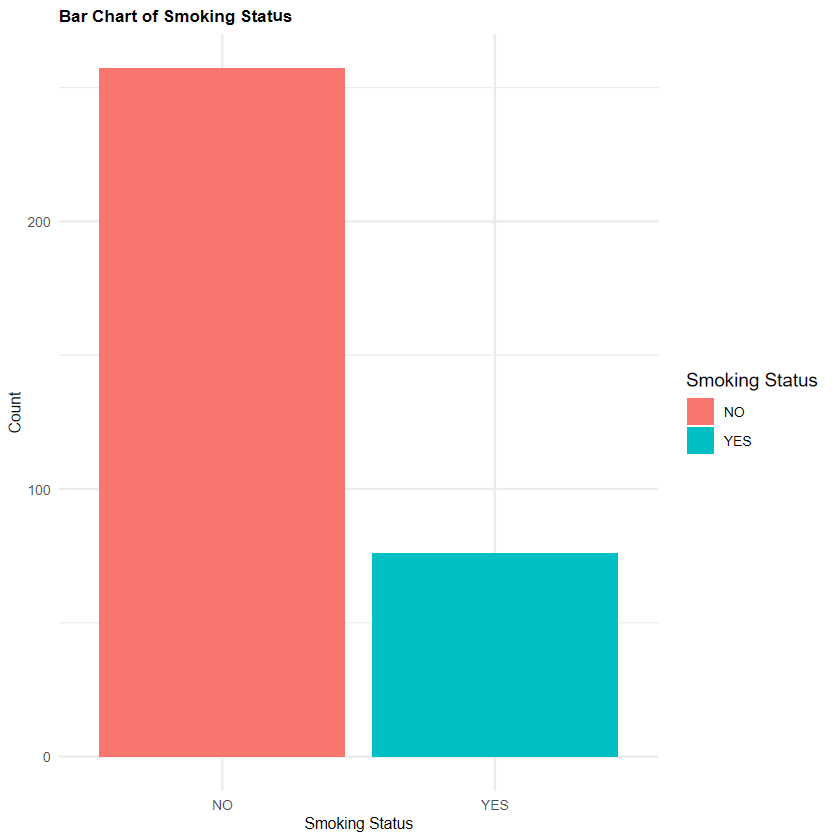

In [20]:
smoke_bar <- ggplot(survey, aes(x = smoke, fill = as.factor(smoke))) +  # Color by category
  geom_bar() +
  labs(title = "Bar Chart of Smoking Status", x = "Smoking Status", y = "Count", fill = "Smoking Status") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

smoke_bar


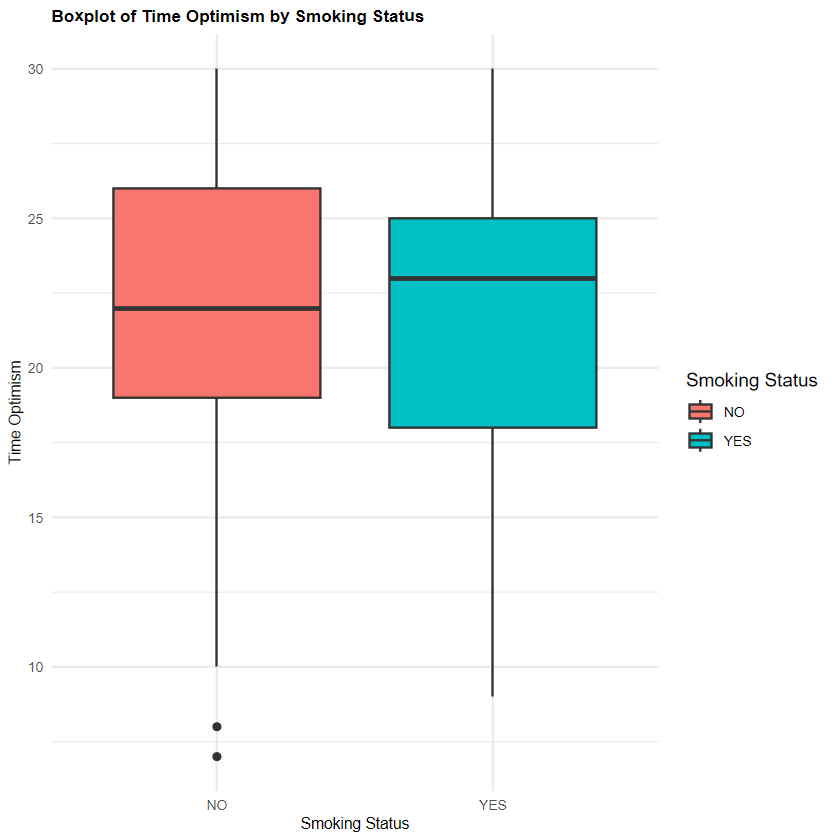

In [22]:
# Box plot Comparing optimism between smokers and non smokers
smoke_box <- ggplot(survey, aes(x = smoke, y = toptim, fill = smoke)) +
  geom_boxplot() +
  labs(title = "Boxplot of Time Optimism by Smoking Status", x = "Smoking Status", y = "Time Optimism", fill = "Smoking Status") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    axis.title = element_text(size = 9),
    axis.text = element_text(size = 8),
    legend.text = element_text(size = 8),
    plot.margin = margin(5, 10, 5, 5)
  )

smoke_box

In [23]:
# Compute correlation coefficients and p-values
cor_results <- data.frame(
  Variable = c("tposaff", "tnegaff", "tmast"),
  Correlation = c(
    cor(survey$toptim, survey$tposaff, use = "complete.obs"),
    cor(survey$toptim, survey$tnegaff, use = "complete.obs"),
    cor(survey$toptim, survey$tmast, use = "complete.obs")
  ),
  P_value = c(
    cor.test(survey$toptim, survey$tposaff)$p.value,
    cor.test(survey$toptim, survey$tnegaff)$p.value,
    cor.test(survey$toptim, survey$tmast)$p.value
  )
)

# Print correlation table
print(cor_results)

  Variable Correlation      P_value
1  tposaff   0.4177735 1.692179e-15
2  tnegaff  -0.3407173 1.700424e-10
3    tmast   0.5690816 5.695808e-30


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Computation failed in `stat_smooth()`.
Caused by error in `loadNamespace()`:
! there is no package called 'mgcv'"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Computation failed in `stat_smooth()`.
Caused by error in `loadNamespace()`:
! there is no package called 'mgcv'"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Computation failed in `stat_smooth()`.
Caused by error in `loadNamespace()`:
! there is no package called 'mgcv'"


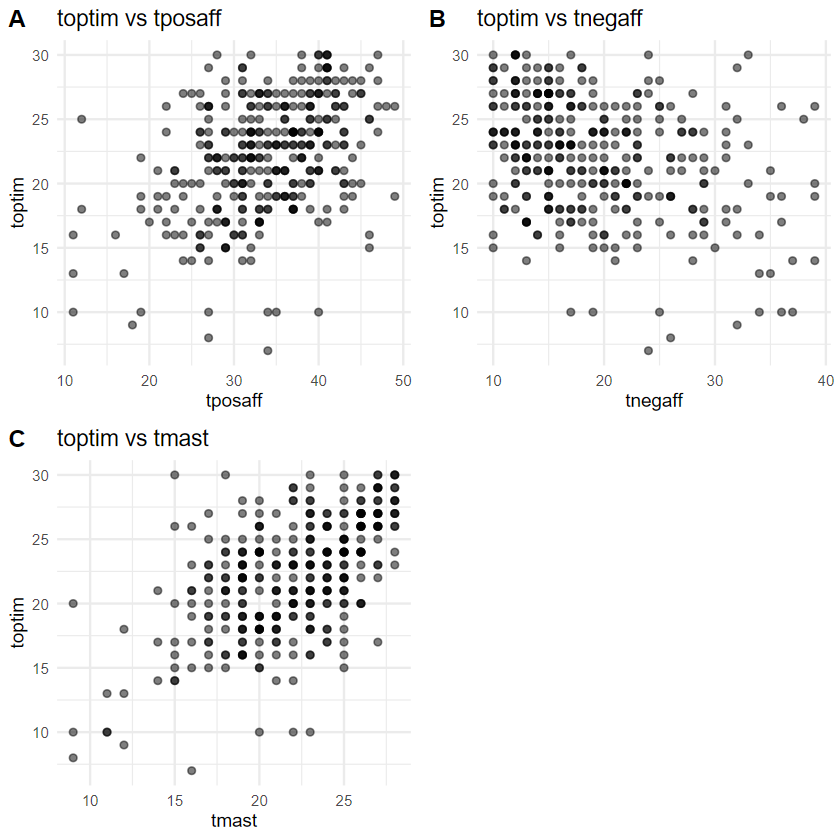

In [ ]:
library(Hmisc)  # For rcorr() function
library(dplyr)  # For data manipulation

# Function to calculate correlation and p-value
test_correlation <- function(data) {
  res <- rcorr(as.matrix(data))
  cor_matrix <- round(res$r, 3)  # Correlation coefficients
  p_matrix <- round(res$P, 3)    # P-values
  list(correlation = cor_matrix, p_value = p_matrix)
}

# Full Dataset Correlation
full_corr <- test_correlation(
  survey %>% select(toptim, tposaff, tnegaff, tmast) %>%
    rename(
      Optimism = toptim,
      `Positive Affect` = tposaff,
      `Negative Affect` = tnegaff,
      Mastery = tmast
    )
)
cat("\nFull Dataset Correlations:\n")
print(full_corr)

# Age Group Correlation Analysis
for (ageg in unique(survey$agegp3)) {
  age_data <- survey %>%
    filter(agegp3 == ageg) %>%
    select(toptim, tposaff, tnegaff, tmast) %>%
    rename(
      Optimism = toptim,
      `Positive Affect` = tposaff,
      `Negative Affect` = tnegaff,
      Mastery = tmast
    )
  
  if (nrow(age_data) > 1) {
    age_corr <- test_correlation(age_data)
    cat(paste("\nAge Group:", ageg, "\n"))
    print(age_corr)
  }
}
